# PreProcessing


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.svm import SVC
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [0]:
X = pandas.read_csv('train.csv')
y=X['Response']

In [0]:
X.Response.unique()

array([7, 6, 1, 4, 2, 8, 5, 3])

In [0]:
Xtrunc=X.loc[X.Response==1][:1000]

for i in range (2,9):
  Xtrunc=Xtrunc.append(X.loc[X.Response==i][:1000])
print(Xtrunc.Response.unique())

[1 2 3 4 5 6 7 8]


In [0]:
print(X.InsuredInfo_9.count()) #nb de gens ayant donné leur religion
print(len(X))

14755
58881


In [0]:
religion=X.InsuredInfo_9.unique()
religion[1]=religion[0]
religion[0]=np.nan
print(religion)

[nan 'Muslim' 'Jewish' 'Christian' 'Buddhist' 'Hindus']


In [0]:
race=X.InsuredInfo_8.unique()
print(race)

[nan 'Caucasian' 'Black' 'Arabic' 'African-American' 'Asian' 'Hispanic'
 'Latino']


In [0]:
X['InsuredInfo_7']=X['InsuredInfo_7'].apply(lambda x: 0 if x=='Male' else 1)
X['InsuredInfo_8']=X['InsuredInfo_8'].apply(lambda x: np.nan if type(np.nan)==type(x) else np.where(race==x)[0][0])
X['InsuredInfo_9']=X['InsuredInfo_9'].apply(lambda x: np.nan if type(np.nan)==type(x) else np.where(religion==x)[0][0])
X['Product_Info_2']=X['Product_Info_2'].apply(lambda x: int(x,16))
print(X.InsuredInfo_7.unique())
print(X.InsuredInfo_8.unique())
print(X.InsuredInfo_9.unique())

[1 0]
[nan  1.  2.  3.  4.  5.  6.  7.]
[ 1. nan  2.  3.  4.  5.]


In [0]:
Xdec=X.copy()

InsuredInfo_7
0    5.471703
1    5.858765
Name: Response, dtype: float64
InsuredInfo_8
1.0    5.564054
2.0    5.604052
3.0    5.000000
4.0    6.081794
5.0    5.455919
6.0    6.166667
7.0    6.084746
Name: Response, dtype: float64
InsuredInfo_9
1.0    6.046136
2.0    5.863776
3.0    4.479210
4.0    4.411552
5.0    4.486128
Name: Response, dtype: float64


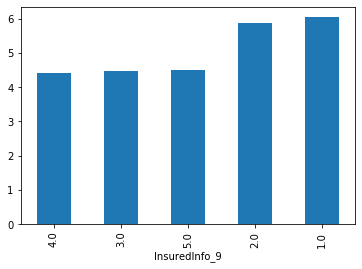

In [0]:
print(Xdec.groupby('InsuredInfo_7').mean().Response)
print(Xdec.groupby('InsuredInfo_8').mean().Response)
print(Xdec.groupby('InsuredInfo_9').mean().Response)

X.groupby('InsuredInfo_9').mean().Response.sort_values().plot.bar()

In [0]:
col1='InsuredInfo_9'

print(Xdec.groupby(col1)['Ht'].mean())


cr=Xdec[Xdec.columns[1:]].corr()[col1].abs()>0.1
idxs=Xdec[Xdec.columns[1:]].corr()[col1][cr].index
vals=X[col1].unique()
for col in idxs:
  if col !=col1:
    if col!='Response':
      for idx in vals:
        if idx is np.nan:
          Xdec.loc[Xdec[col1]==idx,col]=Xdec.loc[Xdec[col1].isnull(),col]-Xdec.loc[Xdec[col1].isnull(),col].mean()
        else:
          Xdec.loc[Xdec[col1]==idx,col]=Xdec.loc[Xdec[col1]==idx,col]-Xdec.loc[Xdec[col1]==idx,col].mean()

print(Xdec.groupby(col1).mean()['Ht'])

InsuredInfo_9
1.0   -0.000824
2.0   -0.002199
3.0    0.001034
4.0    0.001696
5.0    0.002654
Name: Ht, dtype: float64
InsuredInfo_9
1.0   -0.000824
2.0   -0.002199
3.0    0.001034
4.0    0.001696
5.0    0.002654
Name: Ht, dtype: float64


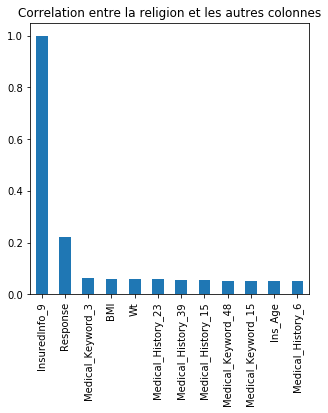

In [0]:
Xplt=Xdec.copy()
col='InsuredInfo_9'
fig=plt.figure(figsize=(5, 5))
plt.title('Correlation entre la religion et les autres colonnes')
cr=abs(Xplt[Xplt.columns[1:]].corr()[col])<0.1
cr2=abs(Xplt[Xplt.columns[1:]].corr()[col])>0.05
Xplt[Xplt.columns[1:]].corr()[col][cr2].abs().sort_values(ascending=False).plot.bar()
plt.savefig('fig.png')

In [0]:
X=Xdec.copy()
X[X.columns[1:]].corr()[col]['Ht']

0.017634461262406705

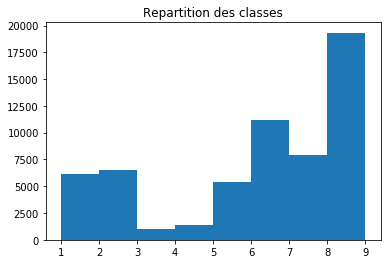

In [0]:
plt.hist(X['Response'], bins=[1,2,3,4,5,6,7,8,9], label=sorted(X.Response.unique()))
plt.title('Repartition des classes')
plt.savefig('repartition.png')

In [0]:
#X=X.drop(columns=['InsuredInfo_7','InsuredInfo_8','InsuredInfo_9','Response'])
X=X.drop(columns='Response')

In [0]:
#simp=IterativeImputer(max_iter=2, random_state=0)
simp=SimpleImputer()
Ximp=simp.fit_transform(X)

In [0]:
Xtrunc=Ximp[:9999,:]
ytrunc=y[:9999]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    Ximp, y, random_state=0)

In [0]:
# Use each type of scaler and train a SVC model for each one.
# Which one is the best ?

# MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

scaler_maxabs = MaxAbsScaler()
scaler_maxabs.fit(Ximp)

X_train_scaled_maxabs = scaler_maxabs.transform(X_train)
X_test_scaled_maxabs  = scaler_maxabs.transform(X_test)



# SVC

In [0]:
svc_maxabs = SVC(C=100, gamma="auto")
svc_maxabs.fit(X_train_scaled_maxabs, y_train)
print("[MaxAbsScaler] accuracy  =", svc_maxabs.score(
    X_test_scaled_maxabs, y_test))

# PCA

In [0]:
X_scaled=scaler_maxabs.transform(Ximp)

In [0]:
# Now we can use PCA.
from sklearn.decomposition import PCA

# Use the documentation of PCA to create a model that will
# only keep 2 components.
pca = PCA(n_components=5)

# Then call the .fit() method of PCA on your scaled data.
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_pca = pca.transform(X_scaled)
print("Shape before PCA:", X_scaled.shape)
print("Shape after PCA:", X_pca.shape)

Shape before PCA: (58881, 125)
Shape after PCA: (58881, 5)


In [0]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, y, random_state=7)

In [0]:
svc_pca = SVC(C=100, gamma="auto")
svc_pca.fit(X_pca_train, y_train)
print("[pca] accuracy  =", svc_pca.score(
    X_pca_test, y_test))

[pca] accuracy  = 0.4112


# Neural Network

In [0]:
!pip install keras==2.3.0

In [0]:
%tensorflow_version 2.x
import tensorflow
import keras
print(keras.__version__)
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot

TensorFlow 2.x selected.
2.3.0


Using TensorFlow backend.


In [0]:
y_trainInt = to_categorical(y_train)[:,1:]
y_testInt = to_categorical(y_test)[:,1:]

In [0]:
np.unique(y_trainInt, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# PCA+NN

In [0]:
model_pca=Sequential()
model_pca.add(Dense(10, input_dim=5, activation='relu'))
model_pca.add(Dense(9, activation='softmax'))

In [0]:
model_pca.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])# adam

In [0]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
history=model_pca.fit(X_pca_train, y_trainInt, epochs=20, validation_split=0.1)

14721/14721 [==============================] - 1s 49us/step
[1.592750065519097, 0.4072413444519043]


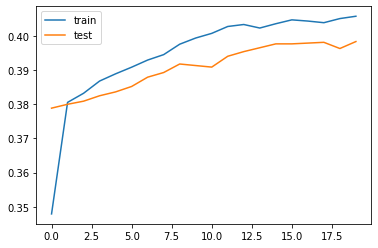

In [0]:
loss_and_metrics = model_pca.evaluate(X_pca_test, y_testInt)
print(loss_and_metrics)

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# NN no PCA

In [0]:
# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])# adam

In [0]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [0]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
history=model.fit(X_train_scaled_maxabs, y_trainInt, epochs=50, validation_split=0.1, callbacks=[mc])

Train on 39744 samples, validate on 4416 samples
Epoch 1/50
20256/39744 [==============>...............] - ETA: 2s - loss: 1.0480 - accuracy: 0.6251

KeyboardInterrupt: ignored

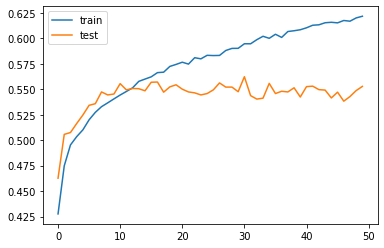

In [0]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train_scaled_maxabs, y_trainInt, verbose=0)
_, test_acc = saved_model.evaluate(X_test_scaled_maxabs, y_testInt, verbose=0)

print(train_acc, test_acc)

0.6108469367027283 0.550777792930603


In [0]:
testpred=np.argmax(saved_model.predict(X_test_scaled_maxabs), axis=1)
test_acc2=np.sum(np.abs(testpred-np.argmax(y_testInt, axis=1)))/len(y_test)
print(test_acc2)

1.2236261123564975


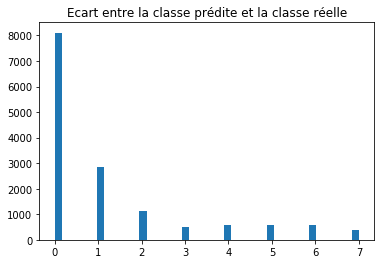

In [0]:
h = pyplot.hist(np.abs(testpred-np.argmax(y_testInt, axis=1)), bins='auto')
pyplot.title('Ecart entre la classe prédite et la classe réelle')
pyplot.savefig('ecart.png')

[55.07778004 19.33292575  7.74403913  3.43047347  3.86522655  4.0078799
  4.04184498  2.49983017]


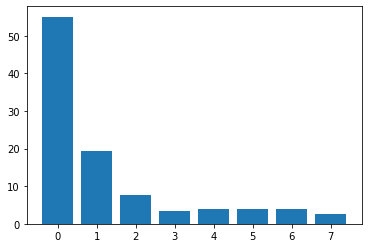

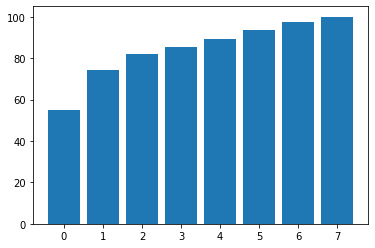

In [0]:
h,b=np.histogram(np.abs(testpred-np.argmax(y_testInt, axis=1)), bins=[0,1,2,3,4,5,6,7,8])
hp=100*h/len(y_test)
print(hp)
pyplot.bar([0,1,2,3,4,5,6,7],hp)
pyplot.show()
cumul=[]
s=0
for i in hp:
  s+=i
  cumul.append(s)
pyplot.bar([0,1,2,3,4,5,6,7],cumul)
pyplot.show()

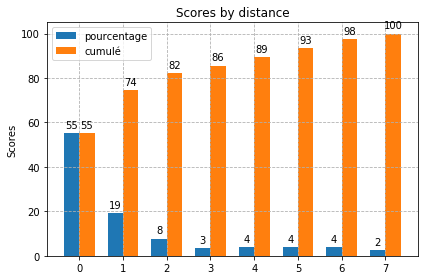

<Figure size 432x288 with 0 Axes>

In [0]:
from matplotlib import pyplot as plt
labels = [0,1,2,3,4,5,6,7]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hp, width, label='pourcentage')
rects2 = ax.bar(x + width/2, cumul, width, label='cumulé')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by distance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.grid(linestyle="--")
plt.show()
plt.savefig('scores.png')

# Predict

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import MaxAbsScaler
import pandas
import numpy as np
import tensorflow
import keras
from keras.models import load_model

In [0]:
X_pred = pandas.read_csv('predict.csv')

In [0]:
print(X_pred.shape)

(500, 128)


In [0]:
religion=X_pred.InsuredInfo_9.unique()

race=X_pred.InsuredInfo_8.unique()

print(religion)
print(race)

X_pred['InsuredInfo_7']=X_pred['InsuredInfo_7'].apply(lambda x: 0 if x=='Male' else 1)
X_pred['InsuredInfo_8']=X_pred['InsuredInfo_8'].apply(lambda x: np.nan if type(np.nan)==type(x) else np.where(race==x)[0][0])
X_pred['InsuredInfo_9']=X_pred['InsuredInfo_9'].apply(lambda x: np.nan if type(np.nan)==type(x) else np.where(religion==x)[0][0])
X_pred['Product_Info_2']=X_pred['Product_Info_2'].apply(lambda x: int(x,16))
#simp=IterativeImputer(max_iter=2, random_state=0)

[nan 'Hindus' 'Jewish' 'Muslim' 'Christian' 'Buddhist']
[nan 'Black' 'Caucasian' 'African-American' 'Hispanic' 'Asian' 'Latino']


In [0]:
print(X_pred['InsuredInfo_7'].unique())
print(X_pred['InsuredInfo_8'].unique())
print(X_pred['InsuredInfo_9'].unique())
print(X_pred['Product_Info_2'].unique())

[0 1]
[nan  1.  2.  3.  4.  5.  6.]
[nan  1.  2.  3.  4.  5.]
[212 167 211 209 161 210 165 168 162 178 166 225 163 193 195 196]


In [0]:
cols=['InsuredInfo_7','InsuredInfo_8','InsuredInfo_9']

for col1 in cols:

  cr=X_pred[X_pred.columns[1:]].corr()[col1].abs()>0.1
  idxs=X_pred[X_pred.columns[1:]].corr()[col1][cr].index
  vals=X[col1].unique()
  for col in idxs:
    if col !=col1:
      if col!='Response':
        for idx in vals:
          if idx is np.nan:
            X_pred.loc[X_pred[col1]==idx,col]=X_pred.loc[X_pred[col1].isnull(),col]-X_pred.loc[X_pred[col1].isnull(),col].mean()
          else:
            X_pred.loc[X_pred[col1]==idx,col]=X_pred.loc[X_pred[col1]==idx,col]-X_pred.loc[X_pred[col1]==idx,col].mean()


In [0]:
#X_pred=X_pred.drop(columns=['InsuredInfo_7','InsuredInfo_8','InsuredInfo_9'])
simp=SimpleImputer()
Ximp_pred=simp.fit_transform(X_pred)
#Ximp_pred=X_pred.fillna(X_pred.mean())

In [0]:
print(Ximp_pred.shape)

(500, 128)


In [0]:
scaler_maxabs = MaxAbsScaler()
Xscaledimp_pred=scaler_maxabs.fit_transform(Ximp_pred)

In [0]:
  # load the saved model
  saved_model = load_model('best_model.h5')
  # evaluate the model
  preds=saved_model.predict(Xscaledimp_pred)

  print(np.argmax(preds, axis=1))
  X_pred['Result']=np.argmax(preds, axis=1)

  X_pred.to_csv('results.csv')

[0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 4 0 1 5 0 0 0 0 0
 1 6 0 1 0 0 0 1 0 0 0 4 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 5 0 0 1 1 0 0 0 1
 4 0 0 0 1 1 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 4 0 0 0
 0 0 6 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 4 1 0 0 0 0 0 1 0 1 0 0 5 0 1 0 0 4 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 4 0 0 0 4 4 0 0 0 0 0 1 0 0 5 0 5 0 4 0
 1 4 6 0 0 1 0 0 4 0 1 0 0 0 4 1 4 1 4 0 1 4 0 0 0 1 0 1 0 1 6 5 4 0 1 1 0
 0 7 0 0 0 0 0 4 0 0 0 0 0 1 0 0 1 1 4 0 0 0 0 1 0 0 0 4 0 0 0 0 0 0 1 0 0
 6 0 4 0 0 2 0 0 6 1 0 0 4 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 6
 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 1 0 0 1 4 0 4 0 0 0 1 0
 0 0 4 0 0 0 0 0 1 1 0 0 0 0 4 6 0 4 0 0 0 0 0 4 0 0 0 0 1 0 0 0 0 0 1 5 0
 0 0 0 1 4 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 1 0 0 0 0 0 0
 0 4 0 0 0 0 0 1 1 0 0 0 6 1 0 0 6 0 0 1 4 1 0 0 0 6 0 0 0 0 0 4 1 0 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 5 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 5 0 0 4 0 1 1 0 0 

# Decision tree

In [0]:
from sklearn import tree

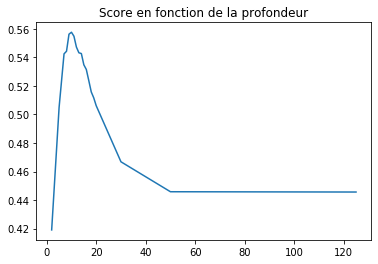

In [0]:
l=[]
xs=[2,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,125]
mx=0
mi=0
for i in xs:
  clf=tree.DecisionTreeClassifier(max_depth=i)
  clf.fit(X_train_scaled_maxabs, y_train)
  #print(clf.score(X_train_scaled_maxabs,y_train))
  l.append(clf.score(X_test_scaled_maxabs,y_test))
  if l[-1]>mx:
    mx=l[-1]
    mi=i

plt.plot(xs,l)
plt.title('Score en fonction de la profondeur')
plt.savefig('dt.png')

In [0]:
print(mi)
print(mx)

10
0.557638747367706


In [0]:
clf=tree.DecisionTreeClassifier(max_depth=mi)
clf.fit(X_train_scaled_maxabs, y_train)
testpredDT=clf.predict(X_test_scaled_maxabs,)
test_acc2=np.sum(np.abs(testpredDT-y_test))/len(y_test)
print(test_acc2)

1.282453637660485


# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled_maxabs, y_train)
print(neigh.score(X_test_scaled_maxabs, y_test))

0.3607091909517017

In [0]:
testpredNN=neigh.predict(X_test_scaled_maxabs)
test_acc2=np.sum(np.abs(testpredNN-y_test))/len(y_test)
print(test_acc2)


1.995244888254874


# Nearest Centroid

In [0]:
from sklearn.neighbors import NearestCentroid

In [0]:
clfNC = NearestCentroid()
clfNC.fit(X_train_scaled_maxabs, y_train)
clfNC.score(X_test_scaled_maxabs, y_test)

0.36872495075062833

In [0]:
testpredNC=clfNC.predict(X_test_scaled_maxabs)
test_acc2=np.sum(np.abs(testpredNC-y_test))/len(y_test)
print(test_acc2)

1.7840499966034915
